<a href="https://www.kaggle.com/code/xpertdl/class23?scriptVersionId=297252119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [25]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

In [12]:
DATA_DIR = "/kaggle/input/face-mask-detection/data"
EVAL_DIR = "/kaggle/input/face-mask-detection/eval"


In [13]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [18]:
dataset = datasets.ImageFolder(DATA_DIR, transform=transform)

train_size = int(0.8 * len(dataset))
test_size  = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Classes:", dataset.classes)

Classes: ['with_mask', 'without_mask']


In [46]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, padding="same")
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding="same") 
        
        self.pool = nn.MaxPool2d(2, 2) 


        
        self.fc1 = nn.Linear(32* 32* 32, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        
        
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)

        # print(x.shape)

        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        
        return x

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
print(32* 32* 32)

32768


In [45]:
model(image)

torch.Size([1, 16, 64, 64])


In [55]:
train_losses = []
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
                                                     
        optimizer.zero_grad()
                                                      
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}, Avg Loss: {epoch_loss:.4f}")


y_tru tensor([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1], device='cuda:0')
y_hat tensor([[ -0.9325,   0.6615],
        [ 15.6139, -20.0412],
        [  2.4461,  -1.2819],
        [  2.8789,  -3.1201],
        [ -2.9288,   2.5756],
        [  2.5335,  -2.7228],
        [ -3.6385,   3.2170],
        [ 10.2973, -13.5638],
        [ -0.1193,   0.3205],
        [  3.3767,  -4.3916],
        [ -2.8320,   4.1418],
        [ -4.3400,   4.6205],
        [ -4.0111,   3.9653],
        [ -3.2321,   2.8438],
        [  3.4911,  -2.2886],
        [  3.5632,  -5.0162],
        [  8.1439,  -8.4324],
        [  3.0671,  -0.3878],
        [  6.2845,  -9.9843],
        [  1.2530,  -5.8567],
        [ -5.2637,   5.5064],
        [  5.4391,  -7.7552],
        [  3.2200,  -2.2156],
        [  0.7420,  -1.4625],
        [ -2.3275,   2.5817],
        [ -6.4492,   7.0679],
        [  3.3204,  -5.9280],
        [ -4.3757,   4.3894],
        [ -3.4501,

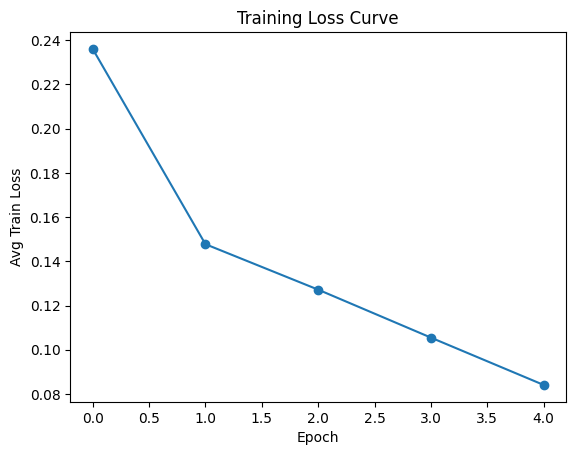

In [51]:
plt.plot(train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Avg Train Loss")
plt.title("Training Loss Curve")
plt.show()


In [52]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, preds = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")


Test Accuracy: 97.25%


In [56]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, preds = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")


Test Accuracy: 95.99%


In [57]:
image, label = dataset[0]
image = image.unsqueeze(0).to(device)
image.shape

torch.Size([1, 3, 128, 128])

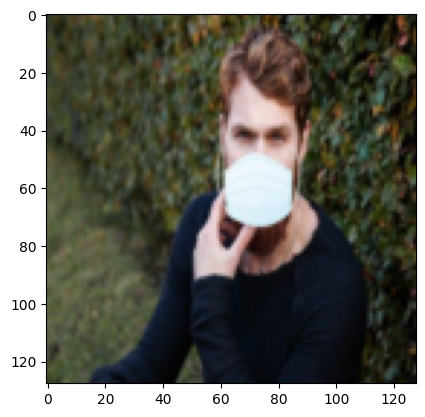

In [58]:
img_rgb = image[0].detach().cpu().numpy().transpose(1, 2, 0) 

plt.imshow(img_rgb)


In [59]:
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [63]:
x = model.conv1(image)
feat1 = torch.relu(x)

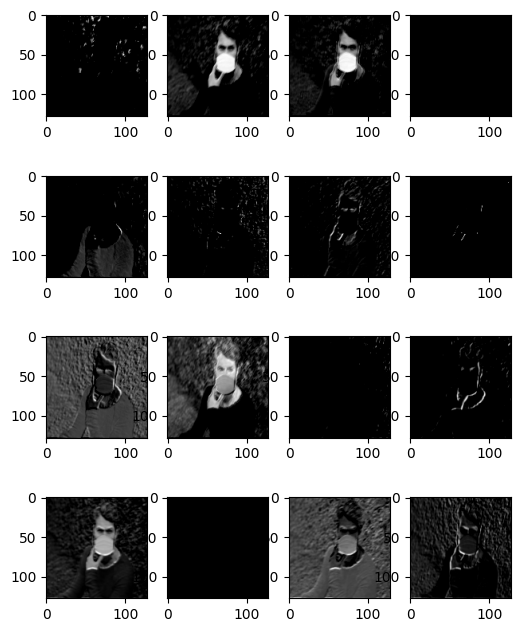

In [66]:
np_feat = feat1.squeeze(0).detach().cpu().numpy()
plt.figure(figsize=(6,8))
for i in range(0, 16):
    plt.subplot(4,4,i+1)
    plt.imshow(np_feat[i], cmap="gray")

In [69]:
x = model.conv2(feat1)
feat2 = torch.relu(x)

In [70]:
np_feat = feat2.squeeze(0).detach().cpu().numpy()


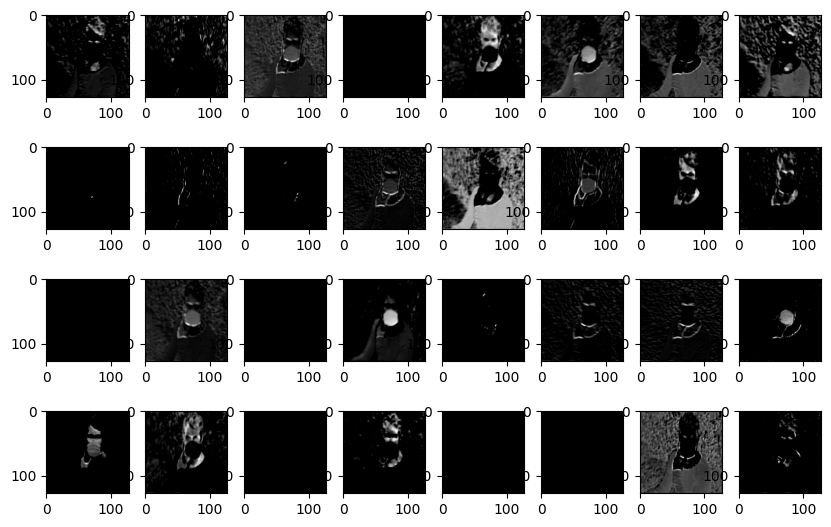

In [71]:
plt.figure(figsize=(10,10))
for i in range(0, 32):
    plt.subplot(6,8,i+1)
    plt.imshow(np_feat[i], cmap="gray")